Журавлев К. В. ПИ20-1 Лаборотарная работа №3

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Задание 1

In [ ]:
a = pd.read_excel('Вариант 1.xlsx', header = 2)

In [ ]:
a

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.000000,24.0
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.000000,24.0
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.000000,24.0
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.000000,24.0
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...
3044,3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3045,3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3046,3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3047,3048.0,144.0,11А,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0


Задание 2

In [ ]:
a['Балл'].describe()

count    3049.000000
mean       72.769029
std        13.662666
min        20.000000
25%        64.000000
50%        72.000000
75%        82.000000
max       100.000000
Name: Балл, dtype: float64

Задание 3

In [ ]:
mean = a['Балл'].describe()[1]
count = a['Балл'].describe()[0]
belowAverage = (a['Балл'] < mean).sum()
print(f'Процент учащихся, выполнивших работу ниже среднего: {round(belowAverage / (count - 1) * 100, 2)}%')

Процент учащихся, выполнивших работу ниже среднего: 51.28%


Задание 4

In [ ]:
min = 24
notPass = (a['Балл'] < min).sum()
print(f'Процент учащихся, не сдавших экзамен: {round(notPass / (count - 1) * 100, 2)}%')

Процент учащихся, не сдавших экзамен: 0.13%


Задание 5

In [ ]:
import matplotlib.pyplot as plt

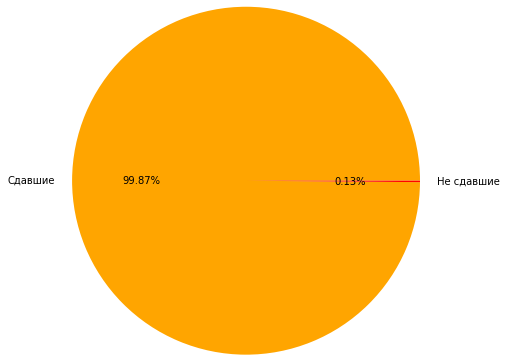

In [ ]:
Pass = (a['Балл'] >= min).sum()
labels = ['Сдавшие', 'Не сдавшие']
plt.pie((Pass, notPass), labels = labels, colors=['orange', 'red'], autopct = '%1.2f%%', radius = 2)
plt.show()

Задание 6

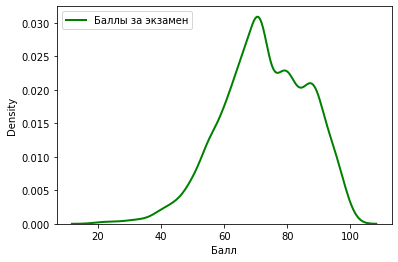

In [ ]:
import seaborn as sns
sns.kdeplot(data=a['Балл'], lw=2, label="Баллы за экзамен", color = 'green')
plt.legend()
plt.show()

Задание 7

In [ ]:
a = a[a.index != 3048]
excellent = (a['Балл'] >= 72).sum()
nicely = a['Балл'].between(57, 71)
satisfactory = a['Балл'].between(36, 56)
unsatisfactory = (a['Балл'] <= 35).sum()
print(f'Сдавших на "отлично": {round((excellent / (count - 1) * 100), 2)}%')
print(f'Сдавших на "хорошо": {round((nicely.sum() / (count - 1) * 100), 2)}%')
print(f'Сдавших на "удовлетворительно": {round((satisfactory.sum() / (count - 1) * 100), 2)}%')
print(f'Сдавших на "неудовлетворительно": {round((unsatisfactory / (count - 1) * 100), 2)}%')

Сдавших на "отлично": 53.31%
Сдавших на "хорошо": 34.45%
Сдавших на "удовлетворительно": 11.55%
Сдавших на "неудовлетворительно": 0.69%


Задание 8

In [ ]:
sex = pd.get_dummies(a['Пол'], drop_first = True)

In [ ]:
a = pd.concat([a, sex], axis = 1)

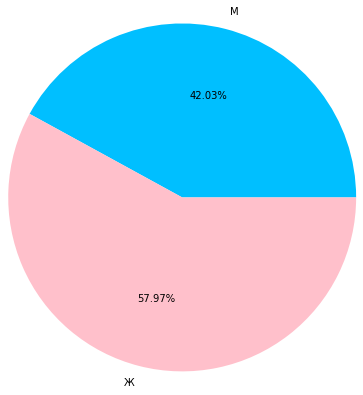

In [ ]:
male = (a['М'] == 1).sum()
female = (a['М'] != 1).sum()
labels = ['М', 'Ж']
plt.pie([male, female], labels = labels, colors=['deepskyblue', 'pink'], autopct = '%1.2f%%', radius = 2)
plt.show()

Задание 9

In [ ]:
print(f'Школ, принимавших участие в экзамене: {a["№ школы"].nunique()}')

Школ, принимавших участие в экзамене: 24


Дополнительные задания


Задание 1

In [ ]:
print(f'Заданий с кратким ответом: {len(a["Задания с кратким ответом"][0])}')
print(f'Заданий с развёрнутым ответом: {int(len(a["Задания с развёрнутым ответом"][0]) / 4)}')

Заданий с кратким ответом: 25
Заданий с развёрнутым ответом: 12


Задание 2

In [ ]:
a = np.arange(10,110,10)

b = a.reshape((5,2))

b[1,1] = 0

a[:5].sum()

110